<a href="https://colab.research.google.com/github/BIJIRAVI/WBC_Segmentaion/blob/master/Copy_of_01_SKLearn_V2_(Intro%2C_Regression%2C_and_Classification_Basics).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##  What is Machine Learning (ML)?
* ### The study of computer programs (algorithms) that can learn by example. 
* ### ML algorithms can generalize from existing examples of a task.

 eg : after seeing a training set of labeled images, an image classifier can figure out how to apply labels accurately to      new, previously unseen images

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

###  Machine Learning brings together statistics, computer science, and more..

* ### Statistical methods
   * Infer conclusions from data
   * Estimate reliability of predictions
* ### Computer science
    * Large-scale computing architectures
    * Algorithms for capturing, manipulating, indexing, combining, retrieving and performing predictions on data
    * Software pipelines that manage the complexity of multiple subtasks
* ### Economics, biology, psychology
    * How can an individual or system efficiently improve their performance in a given environment?
    * What is learning and how can it be optimized?

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Machine Learning algorithms are at the heart of the information economy

   * #### Finance: fraud detection, credit scoring
   * #### Web search
   * #### Speech recognition
   * #### eCommerce: Product recommendations
   * #### Email spam filtering
   * #### Health applications: drug design and discovery
   * #### Education: Automated essay scoring

## Key types of Machine Learning problems

### Supervised machine learning: Learn to predict target values from labelled data.
* Classification (target values are discrete classes)
* Regression (target values are continuous values)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Unsupervised machine learning: Find structure in unlabeled data
* Find groups of similar instances in the data (clustering)
* Finding unusual patterns (outlier detection)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Represent / Train / Evaluate / Refine Cycle

![image.png](attachment:image.png)

### An Example Machine Learning Problem

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

    ### Import required modules and load data file

In [0]:
import pandas as pd

In [0]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')


In [0]:
! cat fruit_data_with_colors.txt

In [0]:
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [0]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

![image.png](attachment:image.png)

In [0]:
?train_test_split

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


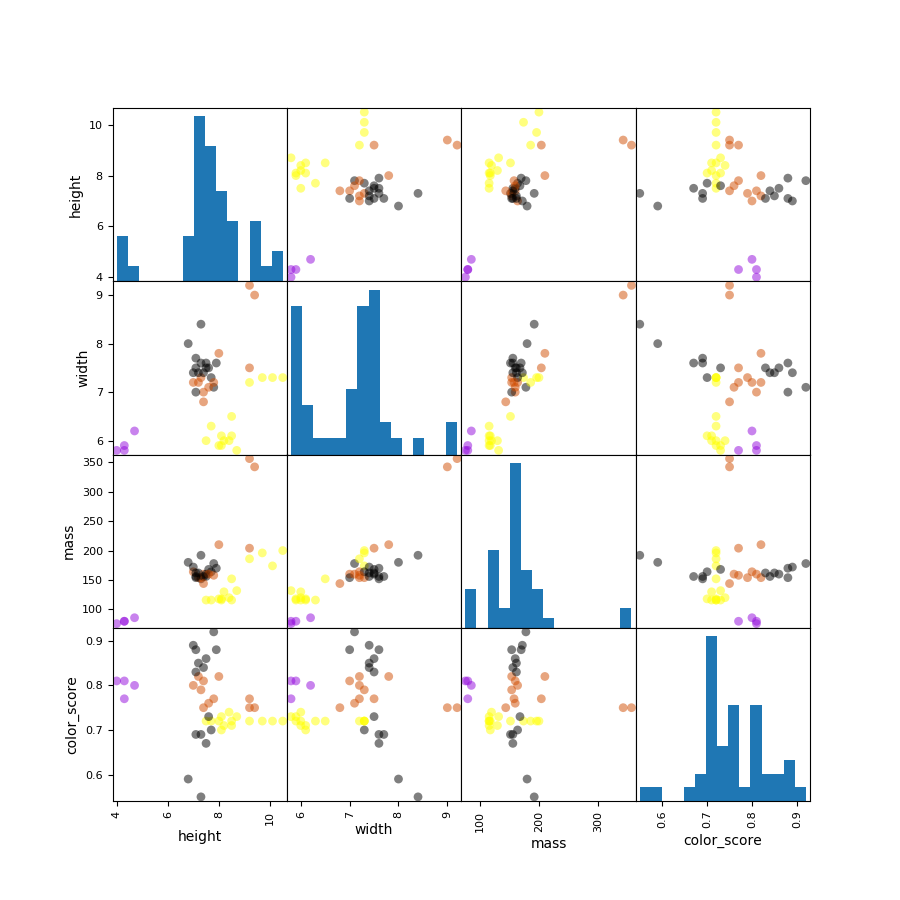

In [0]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)


<IPython.core.display.Javascript object>


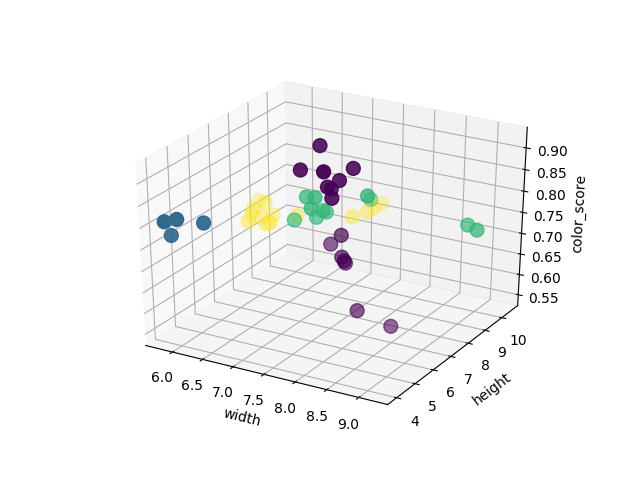

In [0]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

plt.show()

### Create train-test split

In [0]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
#?train_test_split

# K-Nearest Neighbors Classification

## The k-Nearest Neighbor (k-NN) Classifier Algorithm

###  Given a training set X_train with labels y_train, and given a new instance x_test to be classified:

* Find the most similar instances (let's call them X_NN) to x_test that are in X_train.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN
  * e.g. simple majority vote

## A nearest neighbor algorithm needs four things specified
1. A distance metric
   *  Typically Euclidean (Minkowski with p = 2)
2. How many 'nearest' neighbors to look at?
   * e.g. five
3. Optional weighting function on the neighbor points
    * Ignored
4. How to aggregate the classes of neighbor points
   * Simple majority vote
(Class with the most representatives among nearest neighbors)

### Create classifier object

In [0]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [0]:
knn.score(X_test, y_test)

0.53333333333333333

In [0]:
knn.score(X_train, y_train)

0.79545454545454541

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [0]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
#fruit_prediction = knn.predict([[20, 4.3, 5.5],[21, 4.3, 5.5]])

fruit_prediction = knn.predict([[20, 4.3, 5.5]])

lookup_fruit_name[fruit_prediction[0]]


'mandarin'

In [0]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


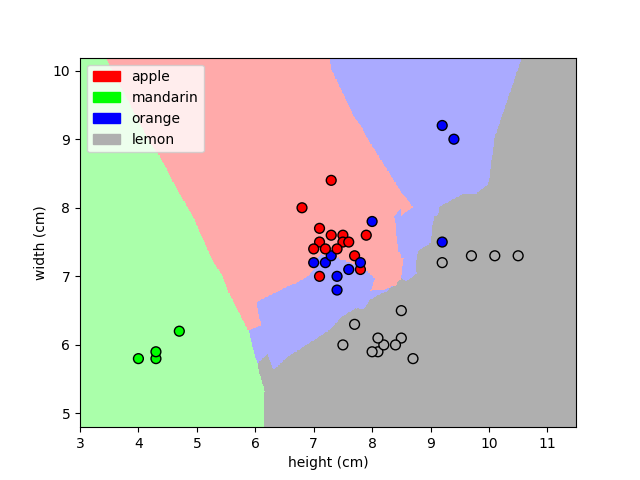

In [0]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


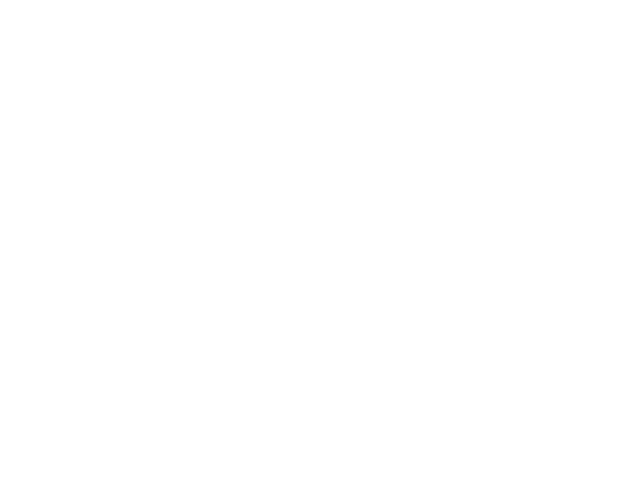

In [0]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


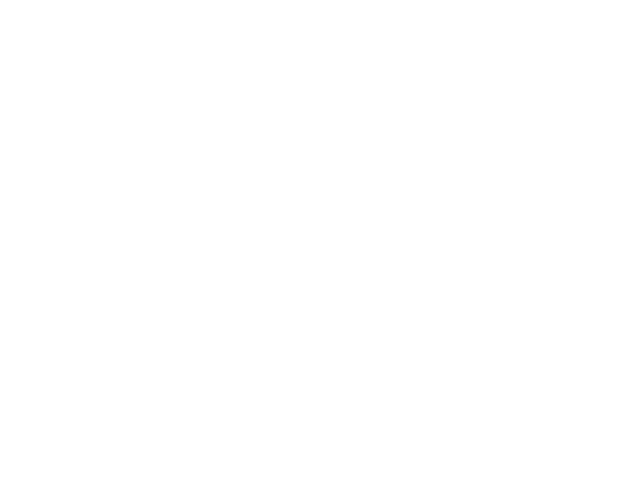

In [0]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [0]:
X_train

,mass,width,height
12,154,7.0,7.1
27,204,7.5,9.2
48,174,7.3,10.1
55,116,6.3,7.7
10,166,6.9,7.3
22,140,7.3,7.1
17,168,7.5,7.6
41,180,7.6,8.2
58,118,6.1,8.1
29,160,7.0,7.4


### Some Data Sets 

In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


## Overfitting and Underfitting


* #### Generalization ability refers to an algorithm's ability to give accurate predictions for new, previously unseen data.

* #### Assumptions:
  * #### Future unseen data (test set) will have the same properties as the current training sets.
  * #### Thus, models that are accurate on the training set are expected to be accurate on the test set.
  * #### But that may not happen if the trained model is tuned too specifically to the training set.
  
* #### Models that are too complex for the amount of training data available are said to overfit and are not likely to generalize well to new examples.
* #### Models that are too simple, that don't even do well on the training data, are said to underfit and also not likely to generalize well.

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Overfitting with k-NN classifiers

![image.png](attachment:image.png)

## Datasets

<IPython.core.display.Javascript object>


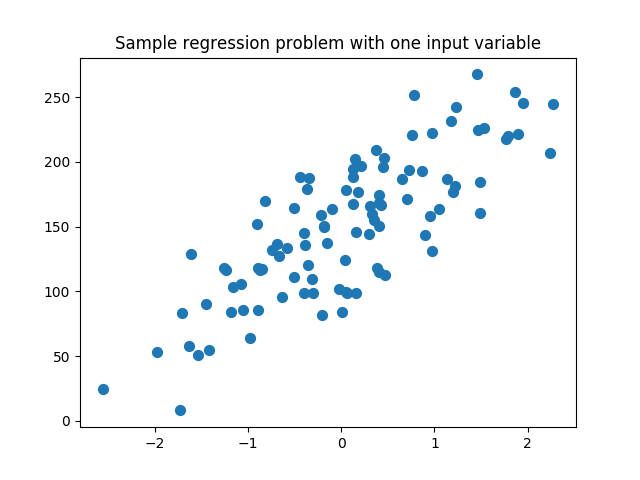

In [0]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()




<IPython.core.display.Javascript object>


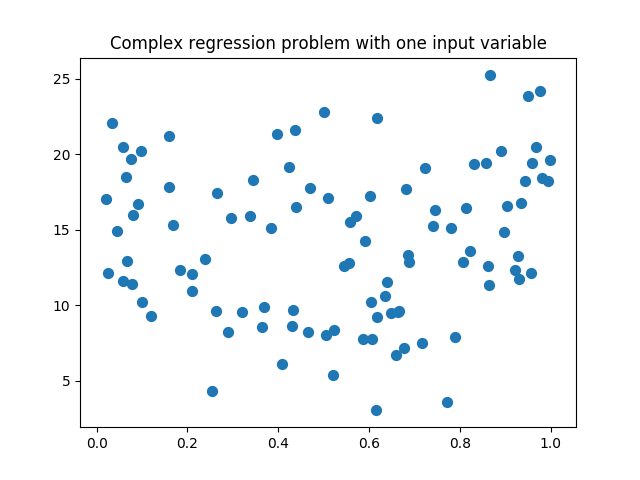

In [0]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()



<IPython.core.display.Javascript object>


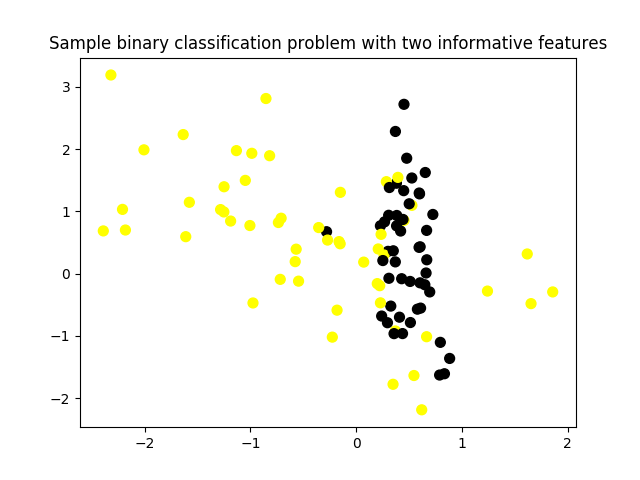

In [0]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()




<IPython.core.display.Javascript object>


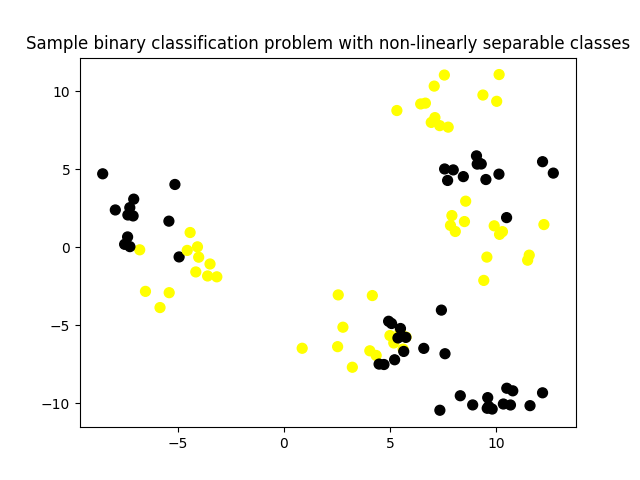

In [0]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()




In [0]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)



In [0]:
cancer.keys()

dict_keys(['data', 'target_names', 'target', 'feature_names', 'DESCR'])

In [0]:
cancer.data

array([[  1.80e+01,   1.04e+01,   1.23e+02, ...,   2.65e-01,   4.60e-01,
          1.19e-01],
       [  2.06e+01,   1.78e+01,   1.33e+02, ...,   1.86e-01,   2.75e-01,
          8.90e-02],
       [  1.97e+01,   2.12e+01,   1.30e+02, ...,   2.43e-01,   3.61e-01,
          8.76e-02],
       ..., 
       [  1.66e+01,   2.81e+01,   1.08e+02, ...,   1.42e-01,   2.22e-01,
          7.82e-02],
       [  2.06e+01,   2.93e+01,   1.40e+02, ...,   2.65e-01,   4.09e-01,
          1.24e-01],
       [  7.76e+00,   2.45e+01,   4.79e+01, ...,   0.00e+00,   2.87e-01,
          7.04e-02]])

In [0]:

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [0]:
X_cancer

## K-Nearest Neighbors

### Given a training set X_train with labels y_train, and given a new instance x_test to be classified:
1. Find the most similar instances (let's call them X_NN) to x_test that are in X_train.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN
   * e.g. simple majority vote

### Classification

In [0]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

In [0]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

# The R 2 ("r-squared") Regression Score

* ## Measures how well a prediction model for regression fits the given data.
* ## The score is between 0 and 1:
     * A value of 0 corresponds to a constant model that predicts the mean value of all training target values.
  
     * A value of 1 corresponds to perfect prediction
* ## Also known as "coefficient of determination"

### KNeighborsClassifier and KNeighborsRegressor: important parameters

   ## Model complexity
  * ## n_neighbors : number of nearest neighbors (k) to consider
     
     - Default = 5
     
## Model fitting
  * ##  metric: distance function between data points
     
     - Default: Minkowski distance with power parameter p = 2
       (Euclidean)

## Linear Regression: Least-Squares

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# Linear Models

### A linear model is a sum of weighted variables that predicts a target output value given an input data instance. Example: predicting housing prices


![image.png](attachment:image.png)

# Linear Regression is an Example of a Linear Model

![image.png](attachment:image.png)

# A Linear Regression Model with one Variable (Feature)

![image.png](attachment:image.png)

# How are Linear Regression Parameters w, b Estimated?

   * ### Parameters are estimated from training data.
   * ### There are many different ways to estimate w and b:
   Different methods correspond to different "fit" criteria and goals and ways to control model complexity.
   
* ### The learning algorithm finds the parameters that optimize an objective function, typically to minimize some kind of loss function of the predicted target values vs. actual target values.

# Least-Squares Linear Regression("Ordinary Least-Squares")

![image.png](attachment:image.png)

### Regression model complexity as a function of K

In [0]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear models for regression

### Linear regression

In [0]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

### Linear regression: example plot 

In [0]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [0]:
X_crime.head()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

![image.png](attachment:image.png)

## Ridge regression

* #### Ridge regression learns w, b using the same least-squares criterion but adds a penalty for large variations in w parameters.
 ![image.png](attachment:image.png)
* #### Once the parameters are learned, the ridge regression prediction formula is the same as ordinary least-squares.
* #### The addition of a parameter penalty is called regularization. Regularization prevents overfitting by restricting the model, typically to reduce its complexity.
* #### Ridge regression uses L2 regularization: minimize sum of squares of w entries
* #### The influence of the regularization term is controlled by the α parameter.
* #### Higher alpha means more regularization and simpler models.

In [0]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846672
ridge regression linear model coeff:
[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.34e-04   3.14e-04  -4.13e-04
  -1.81e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.03

# Ridge regression with feature normalization

## The Need for Feature Normalization

* #### Important for some machine learning methods that all features areon the same scale (e.g. faster convergence in learning, moreuniform or 'fair' influence for all weights)
    * e.g. regularized regression, k-NN, support vector machines, neural networks,.....

* #### Can also depend on the data. More on feature engineering later in the course. For now, we do MinMax scaling of the features:
  ![image.png](attachment:image.png)


![image.png](attachment:image.png)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

# Feature Normalization: The test set must use identical scaling to the training set

* ### Fit the scaler using the training set, then apply the same scaler to transform the test set.
* ### Do not scale the training and test sets using different scalers:this could lead to random skew in the data.
* ### Do not fit the scaler using any part of the test data: referencingthe test data can lead to a form of data leakage. More on this issue later in the course.

#### Ridge regression with regularization parameter: alpha

In [0]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

### Lasso regression

##  Lasso regression is another form of regularized linear regression that uses an L1 regularization penalty for training (instead of ridge's L2 penalty)

* #### L1 penalty: Minimize the sum of the absolute values of the coefficients
![image.png](attachment:image.png)
* #### This has the effect of setting parameter weights in w to zero for the least influential variables. This is called a sparse solution: a kind of feature selection
* #### The parameter αα controls amount of L1 regularization (default = 1.0).
* #### The prediction formula is the same as ordinary least-squares.
* #### When to use ridge vs lasso regression:

   * Many small/medium sized effects: use ridge.
   * Only a few variables with medium/large effect: use lasso.

In [0]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985809
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with 

#### Lasso regression with regularization parameter: alpha

In [0]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Polynomial regression

## Polynomial Features with Linear Regression

![image.png](attachment:image.png)


![image.png](attachment:image.png)

##  Polynomial Features with Linear Regression

* ### Why would we want to transform our data this way?
    *  To capture interactions between the original features by adding them as features to the linear model.
    * To make a classification problem easier (we'll see this later).
* ### More generally, we can apply other non-linear transformations to create new features
    * (Technically, these are called non-linear basis functions)
* ### Beware of polynomial feature expansion with high as this can lead to complex models that overfit
     * Thus, polynomial feature expansion is often combined with a regularized learning method like ridge regression.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

In [0]:
X_F1[0,:]

In [0]:
poly02 = PolynomialFeatures(degree=2)
X_F1_poly2 = poly02.fit_transform(X_F1)
X_F1_poly2[0,:]

## Linear models for classification

### Logistic regression

![image.png](attachment:image.png)

### Linear models for classification: Logistic Regression

![image.png](attachment:image.png)

### Linear models for classification: Logistic Regression

![image.png](attachment:image.png)

### Logistic Regression for binary classification 

![image.png](attachment:image.png)




![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

In [0]:
#y_fruits_2d == 1 

<IPython.core.display.Javascript object>


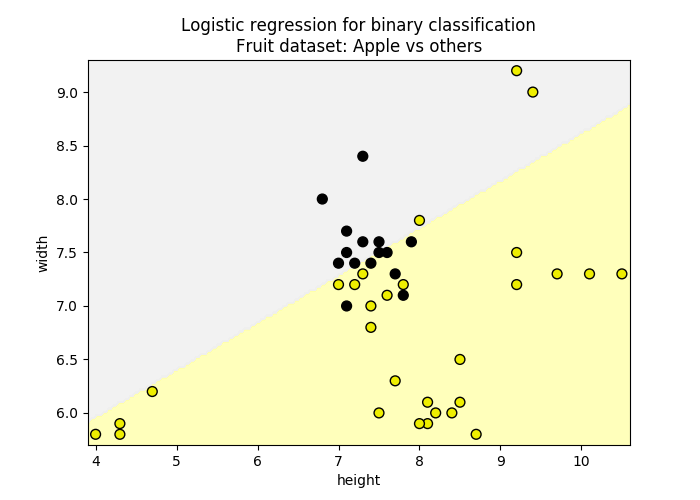

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


In [0]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

<IPython.core.display.Javascript object>


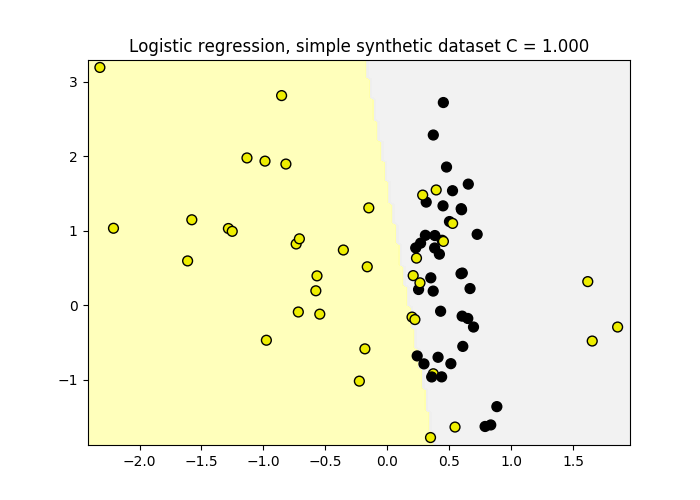

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


In [0]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

### Logistic regression regularization: C parameter

* ####  L2 regularization is 'on' by default (like ridge regression)
* #### Parameter C controls amount of regularization (default 1.0)
* #### As with regularized linear regression, it can be important to normalize all features so that they are on the same scale.

<IPython.core.display.Javascript object>


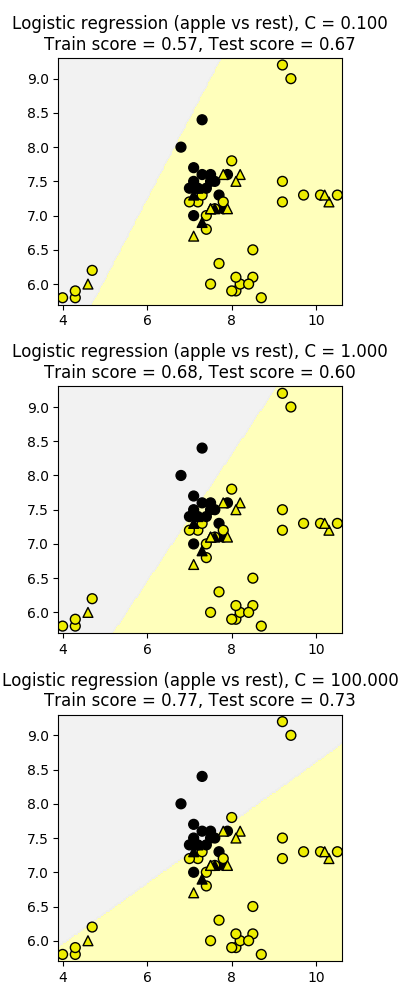

In [0]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

#### Application to real dataset

In [0]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


### Support Vector Machines

### Linear classifiers: how would you separate these two groups of training examples with a straight line?

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Linear Classifiers

![image.png](attachment:image.png)

### Classifier Margin

![image.png](attachment:image.png)

### Maximum margin linear classifier: Linear Support Vector Machines
![image.png](attachment:image.png)

### Regularization for SVMs: the C parameter

* #### The strength of regularization is determined by C
* #### Larger values of C: less regularization
   * Fit the training data as well as possible
   * Each individual data point is important to classify correctly
* #### Smaller values of C: more regularization
   * More tolerant of errors on individual data points

### Linear Models: Pros and Cons

![image.png](attachment:image.png)

## linear_model: Important Parameters
### Model complexity

* #### alpha: weight given to the L1 or L2 regularization term in regression models
    * default = 1.0
* #### C: regularization weight for LinearSVC and LogisticRegression classification models
    * default = 1.0

#### Linear Support Vector Machine

In [0]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

In [0]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    print (clf.score(X_train, y_train), clf.score(X_test, y_test))

plt.tight_layout()

#### Application to real dataset

In [0]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [0]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

#### Multi-class results on the fruit dataset

In [0]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

#### linear support vector classifiers could effectively find a decision boundary with maximum margin

![image.png](attachment:image.png)

#### more complex binary classification problems

![image.png](attachment:image.png)

### A simple 1-dimensional classification problem for a linear classifier

![image.png](attachment:image.png)

### A more perplexing 1-d classification problem for a linear classifier

![image.png](attachment:image.png)

### Let's transform the data by adding a second dimension/feature (set to the squared value of the first feature) 

![image.png](attachment:image.png)

### The data transformation makes it possible to solve this with a linear classifier

![image.png](attachment:image.png)

### What does the linear decision boundary correspond to in the original input space?

![image.png](attachment:image.png)

### Transforming the data can make it much easier for a linear classifier.

![image.png](attachment:image.png)

### Example of mapping a 2D classification problem to a 3D feature space to make it linearly separable

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Radial Basis Function Kernel

![image.png](attachment:image.png)

### Classification

In [0]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

![image.png](attachment:image.png)

In [0]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [0]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [0]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

In [0]:
??SVC

### Kernelized Support Vector Machines: pros and cons

![image.png](attachment:image.png)

# Kernelized Support Vector Machines (SVC): Important parameters

## Model complexity

* #### kernel: Type of kernel function to be used
   * Default = 'rbf' for radial basis function
   *Other types include 'polynomial'
* #### kernel parameters
   * gamma (γγ): RBF kernel width
* #### C: regularization parameter
* #### Typically C and gamma are tuned at the same time.

## Cross-validation


* ### Uses multiple train-test splits, not just a single one
* ### Each split used to train & evaluate a separate model
* ### Why is this better?

   * The accuracy score of a supervised learning method can vary, depending on which samples happen to end up in the     training set.
   * Using multiple train-test splits gives more stable and reliable estimates for how the classifier is likely to  perform on average.
   * Results are averaged over multiple different training sets instead of relying on a single model trained on a particular training set


### Cross-validation Example (5-fold)

![image.png](attachment:image.png)

## Stratified Cross-validation

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Leave-one-out cross-validation (with N samples in dataset)

![image.png](attachment:image.png)

### Example based on k-NN classifier with fruit dataset (2 features)

In [0]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

## Validation curve example

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [0]:
np.logspace(-3, 3, 4)

In [0]:
print(train_scores)

In [0]:
print(test_scores)

In [0]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

#### Decision Tree Example

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Decision Tree Splits
![image.png](attachment:image.png)

### Informativeness of Splits
![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Controlling the Model Complexity of Decision Trees
![image.png](attachment:image.png)

## Visualizing Decision Trees

![image.png](attachment:image.png)

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

In [0]:
#iris.data

#### Setting max decision tree depth to help avoid overfitting

In [0]:
# In linux use sudo apt-get install graphviz if you have error
# In Windows or Mac download from http://www.graphviz.org/download/

In [0]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

### Visualizing decision trees

#### Feature Importance: How important is a feature to overall prediction accuracy?
![image.png](attachment:image.png)

In [0]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

In [0]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

#### Feature importance

In [0]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

## Decision Trees: Pros and Cons
![image.png](attachment:image.png)

### Decision Trees: DecisionTreeClassifier Key Parameters

* ### max_depth: controls maximum depth (number of split points). Most common way to reduce tree complexity and overfitting.
* ### min_samples_leaf: threshold for the minimum # of data instances a leaf can have to avoid further splitting.
* ### max_leaf_nodes: limits total number of leaves in the tree.
* ### In practice, adjusting only one of these (e.g. max_depth) is enough to reduce overfitting.

In [0]:
?clf

In [0]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

In [0]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [0]:
print(clf.score(X_train,y_train), clf.score(X_test,y_test))

In [0]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()